In [48]:
%matplotlib inline
import os

EXPERIMENT_DIR='/mnt/data/jemmons/vfeedbacknet-results/'

In [475]:
import matplotlib.pyplot as plt

def get_data(training_csv):
    with open(training_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = list(filter(lambda x : 'OVERFIT' not in x, lines))
        lines = list(filter(lambda x : '#' not in x, lines))
        lines = list(filter(lambda x : 'batch_num' not in x, lines))
        lines = lines[7:] # strip away the logging information
        
        #header = lines[0]
        #assert len(header.split(', ')) == 15, 'expected 15 columns in header but got {}'.format(len(header.split(', ')))
        #print(header)
        #lines = lines[1:]
        
        data = []
        for line in lines:
            try:  
                #batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
                n, epoch, step, lr, fb, tr_top1, tr_top3, tr_top5, tr_loss, te_top1, te_top3, te_top5, te_loss, ckpt, ckpt_npz = line.split(',')
                d = {
                        'batch_num' : int(n),
                        'learning_rate' : float(lr),
                        'feedback_iteration' : int(fb),
                        'train_top1_acc' : float(tr_top1) if not tr_top1.isspace() else None,
                        'train_top3_acc' : float(tr_top3) if not tr_top3.isspace() else None,
                        'train_top5_acc' : float(tr_top5) if not tr_top5.isspace() else None,
                        'train_loss' : float(tr_loss) if not tr_loss.isspace() else None,
                        'test_top1_acc' : float(te_top1) if not te_top1.isspace() else None,
                        'test_top3_acc' : float(te_top3) if not te_top3.isspace() else None,
                        'test_top5_acc' : float(te_top5) if not te_top5.isspace() else None,
                        'test_loss' : float(te_loss) if not te_loss.isspace() else None,
                        'checkpoint' : ckpt
                    }
                data.append(d)
            except:
                print('error processing:', line)
                break
                
        print('bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL')
        print('\n'.join(lines[-9:]))
        print('batch_num:', max(list(map(lambda x: x['batch_num'], data))))
        
        return header, data
    
def plot_accuracy(data, num_feedback=1, ylim=None):
    try:  
        fig = plt.figure(figsize=(15, 5))
  
        train_colors = ["#555555", "#777777", "#bababa"]
        test_color = ["#6da5ff", "#99c0ff", "#c4e3ff"]
        
        plot_data = []
        for i in range(num_feedback):
            data_ = list(filter(lambda x: x['feedback_iteration'] == i, data))
            
            train_acc = list(filter(lambda x : x['train_top1_acc'] is not None, data_))
            train_acc_x = list(map(lambda x : x['batch_num'], train_acc))
            train_acc1_y = list(map(lambda x : x['train_top1_acc'], train_acc))
            train_acc3_y = list(map(lambda x : x['train_top3_acc'], train_acc))
            train_acc5_y = list(map(lambda x : x['train_top5_acc'], train_acc))

            test_acc = list(filter(lambda x : x['test_top1_acc'] is not None, data_))
            test_acc_x = list(map(lambda x : x['batch_num'], test_acc))
            test_acc1_y = list(map(lambda x : x['test_top1_acc'], test_acc))
            test_acc3_y = list(map(lambda x : x['test_top3_acc'], test_acc))
            test_acc5_y = list(map(lambda x : x['test_top5_acc'], test_acc))
    
            plot_data.append({
                'train_x' : train_acc_x,
                'train_acc1' : train_acc1_y,
                'train_acc3': train_acc3_y,
                'train_acc5': train_acc5_y,
                'test_x' : test_acc_x,
                'test_acc1' : test_acc1_y,
                'test_acc3': test_acc3_y,
                'test_acc5': test_acc5_y,
            })
                    
        plot_data.reverse()
            
        # plot top-1
        ax1 = fig.add_subplot(131)
        ax1.set_ylim([0, ylim])
        ax1.set_title('Top-1 Accuracy\n(black = train, blue = validation\ndarker => more feedback)')
        ax1.set_xlabel('Batch number')
        ax1.set_ylabel('Top-1 Accuracy')
        for i in range(num_feedback):
            d = plot_data[i]
            train_c = train_colors[i]
            ax1.plot(d['train_x'], d['train_acc1'],  color=train_c, ls="-", marker="o")
            
        for i in range(num_feedback):
            d = plot_data[i]
            test_c = test_color[i]
            ax1.plot(d['test_x'], d['test_acc1'], color=test_c, ls="-", marker="o")

        # plot top-3
        ax2 = fig.add_subplot(132)
        ax2.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc3_y), max(test_acc3_y))])
        ax2.set_title('Top-3 Accuracy\n(black = train, blue = validation\ndarker => more feedback)')
        ax2.set_xlabel('Batch number')
        ax2.set_ylabel('Top-3 Accuracy')
        for i in range(num_feedback):
            d = plot_data[i]
            train_c = train_colors[i]
            ax2.plot(d['train_x'], d['train_acc3'],  color=train_c, ls="-", marker="o")
            
        for i in range(num_feedback):
            d = plot_data[i]
            test_c = test_color[i]
            ax2.plot(d['test_x'], d['test_acc3'], color=test_c, ls="-", marker="o")
        vfeedbacknet_test
        # plot top-5
        ax3 = fig.add_subplot(133)
        ax3.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc5_y), max(test_acc5_y))])
        ax3.set_title('Top-5 Accuracy\n(black = train, blue = validation\ndarker => more feedback)')
        ax3.set_xlabel('Batch number')
        ax3.set_ylabel('Top-5 Accuracy')           
        for i in range(num_feedback):
            d = plot_data[i]
            train_c = train_colors[i]
            ax3.plot(d['train_x'], d['train_acc5'],  color=train_c, ls="-", marker="o")
            
        for i in range(num_feedback):
            d = plot_data[i]
            test_c = test_color[i]
            ax3.plot(d['test_x'], d['test_acc5'], color=test_c, ls="-", marker="o")     

    except: 
        pass
    
    plt.tight_layout()
    
    
def plot_loss(data):
    try:
        fig = plt.figure(figsize=(10, 5))
        train_loss = list(filter(lambda x : x['train_loss'] is not None, data))
        train_loss_x = list(map(lambda x : x['batch_num'], train_loss))
        train_loss_y = list(map(lambda x : x['train_loss'], train_loss))

        ax1 = fig.add_subplot(121)
        ax1.set_ylim([0, 1.1*max(train_loss_y)])
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Batch number')
        ax1.set_ylabel('Loss value')
        ax1.plot(train_loss_x, train_loss_y, color="#555555", ls="-", marker="o")

        test_loss = list(filter(lambda x : x['test_loss'] is not None, data))
        test_loss_x = list(map(lambda x : x['batch_num'], test_loss))
        test_loss_y = list(map(lambda x : x['test_loss'], test_loss))
        ax2 = fig.add_subplot(122)
        ax2.set_ylim([0, 1.1*max(test_loss_y)])
        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Minibatch number')
        ax2.set_ylabel('Loss value')
        ax2.plot(test_loss_x, test_loss_y, color="#6da5ff", ls="-", marker="o")
    
    except:
        pass
    
    plt.tight_layout()

    
def plot_learning_rate(data):
    try:
        fig = plt.figure(figsize=(5, 5))
        batch_num = list(map(lambda x : x['batch_num'], data))
        learning_rate = list(map(lambda x : x['learning_rate'], data))

        ax1 = fig.add_subplot(111)
        ax1.set_ylim([min(0.0005, 0.98*min(learning_rate)), 1.1*max(learning_rate)])
        ax1.set_title('Learning Rate')
        ax1.set_xlabel('Batch number')
        ax1.set_ylabel('Learning Rate')
        ax1.semilogy(batch_num, learning_rate, color="#555555", ls="-", marker="o")

    except:
        pass
 
    plt.tight_layout()

In [486]:
# Name: model17.f
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model17.f.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL



ValueError: max() arg is an empty sequence

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
410, 0, 879.0, 0.0016572476597502828, 0, 0.4033203125, 0.693359375, 0.8203125, 4852477.25, , , , , ,
410, 0, 879.0, 0.0016572476597502828, 1, 0.4482421875, 0.7470703125, 0.8583984375, 4852477.25, , , , , ,
410, 0, 879.0, 0.0016572476597502828, 2, 0.4716796875, 0.76953125, 0.869140625, 4852477.25, , , , , ,
batch_num: 410


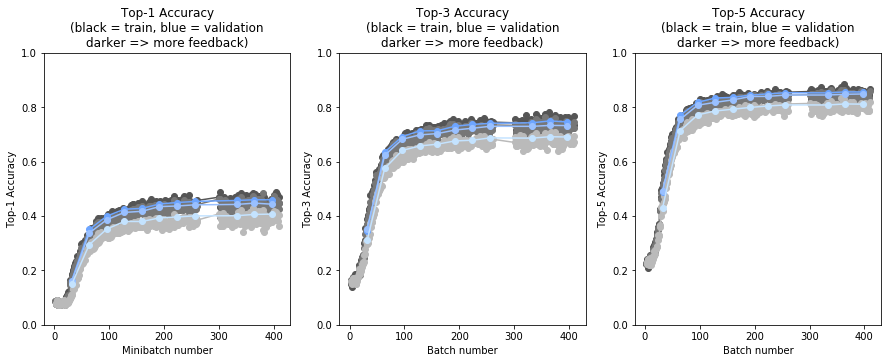

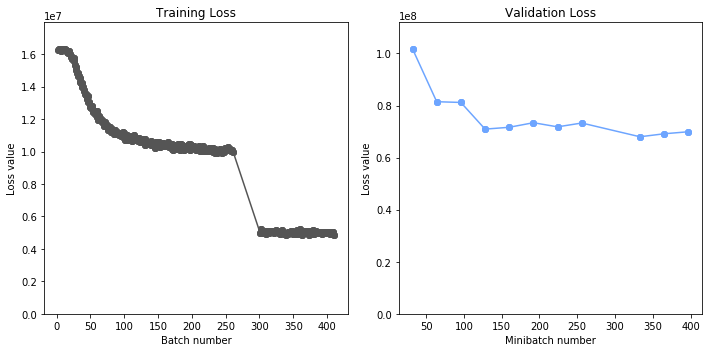

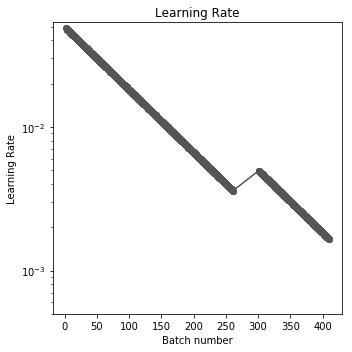

In [450]:
# Name: model17
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model17.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 58


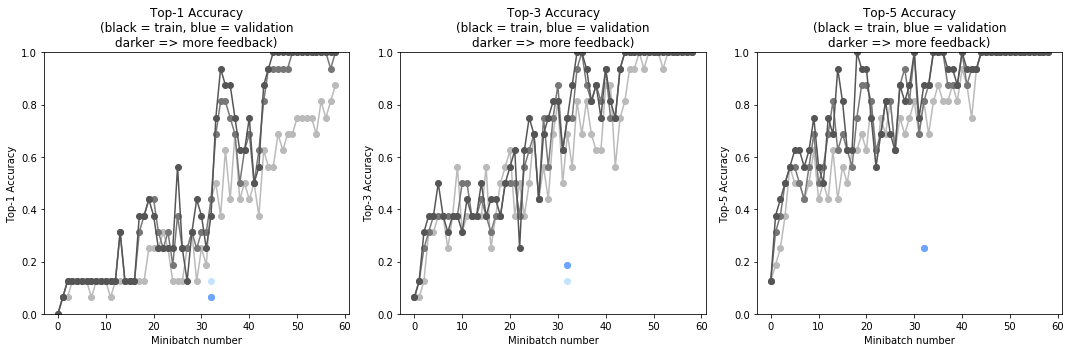

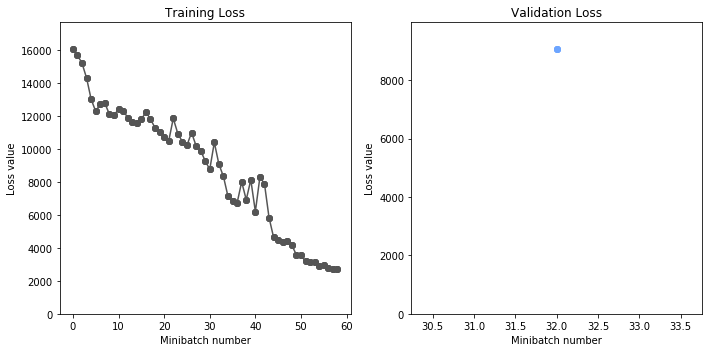

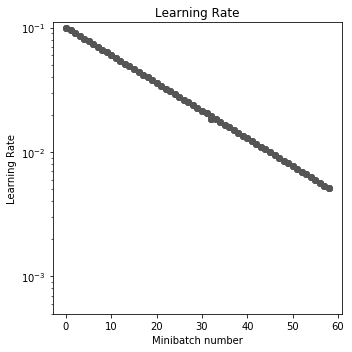

In [294]:
# Name: model17
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model17.overfit', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
1458, 3, 19447.0, 5.1072423957521096e-05, 0, 0.51318359375, 0.80859375, 0.8916015625, 14708956.75, , , , , ,
1458, 3, 19447.0, 5.1072423957521096e-05, 1, 0.66259765625, 0.8837890625, 0.9404296875, 14708956.75, , , , , ,
1458, 3, 19447.0, 5.1072423957521096e-05, 2, 0.67236328125, 0.8955078125, 0.94921875, 14708956.75, , , , , ,
1459, 3, 19455.0, 5.081706331111491e-05, 0, 0.52392578125, 0.8173828125, 0.90380859375, 14530367.0, , , , , ,
1459, 3, 19455.0, 5.081706331111491e-05, 1, 0.66748046875, 0.88916015625, 0.94140625, 14530367.0, , , , , ,
1459, 3, 19455.0, 5.081706331111491e-05, 2, 0.697265625, 0.91162109375, 0.95361328125, 14530367.0, , , , , ,
1460, 3, 19463.0, 5.05629759572912e-05, 0, 0.54150390625, 0.82861328125, 0.90234375, 14334489.625, , , , , ,
1460, 3, 19463.0, 5.05629759572912e-05, 1, 0.67138671875, 0.896484375, 0.9375, 14334489.625, , , , , ,
1460, 3, 19463.0, 5.05629759572912e-05, 2, 0.70703125, 0.9130859375,

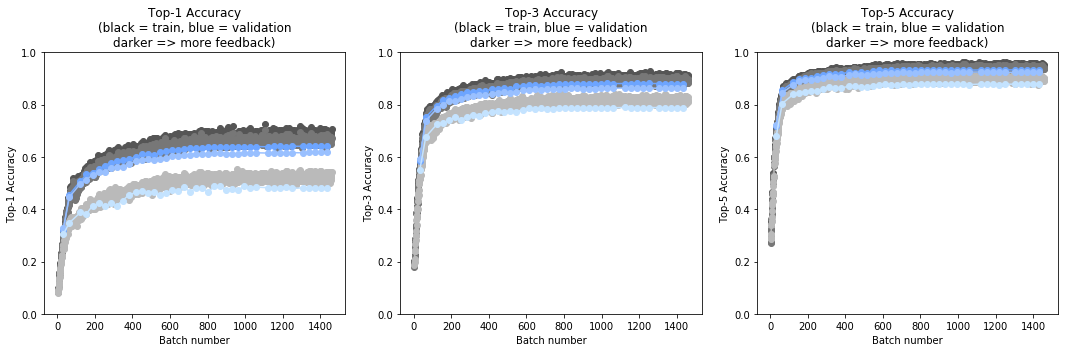

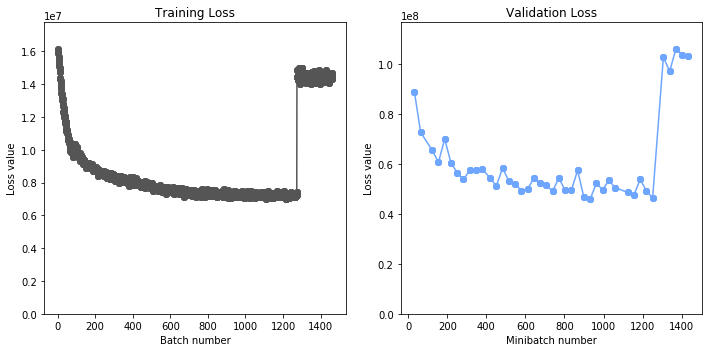

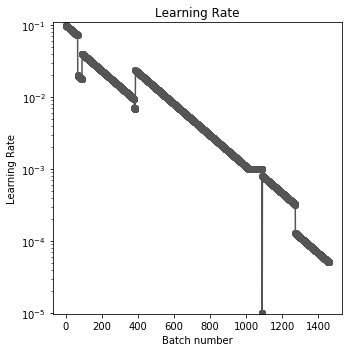

In [485]:
# Name: model16
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model16.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
974, 5, 9599.0, 0.0010000000474974513, 0, 0.31574074074074077, 0.549074074074074, 0.6907407407407408, 3898998.5, , , , , ,
974, 5, 9599.0, 0.0010000000474974513, 1, 0.32685185185185184, 0.562037037037037, 0.6990740740740741, 3898998.5, , , , , ,
974, 5, 9599.0, 0.0010000000474974513, 2, 0.32592592592592595, 0.5574074074074075, 0.700925925925926, 3898998.5, , , , , ,
batch_num: 974


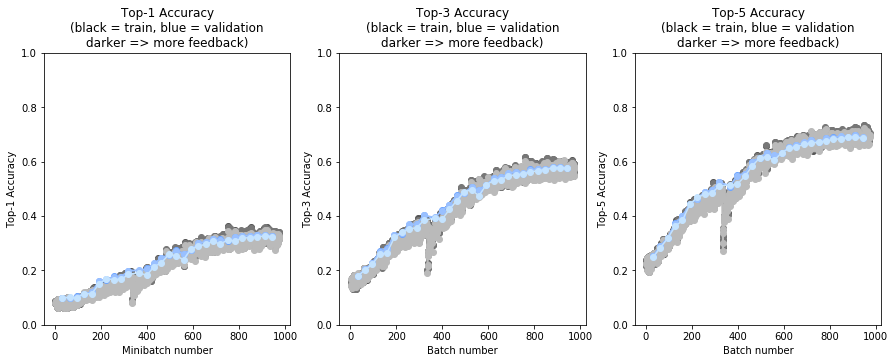

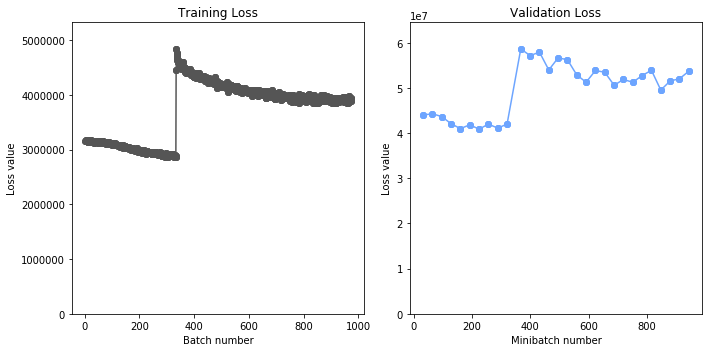

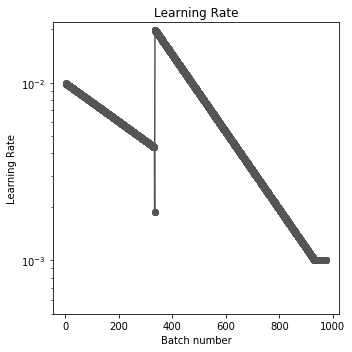

In [456]:
# Name: model15
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model15', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 114


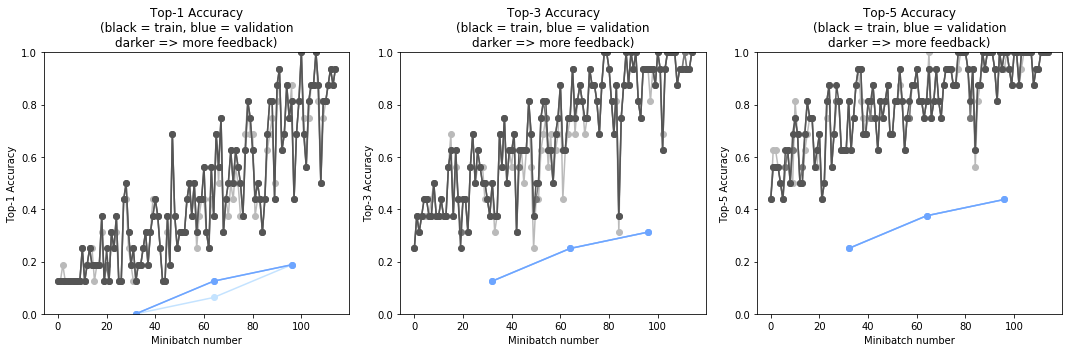

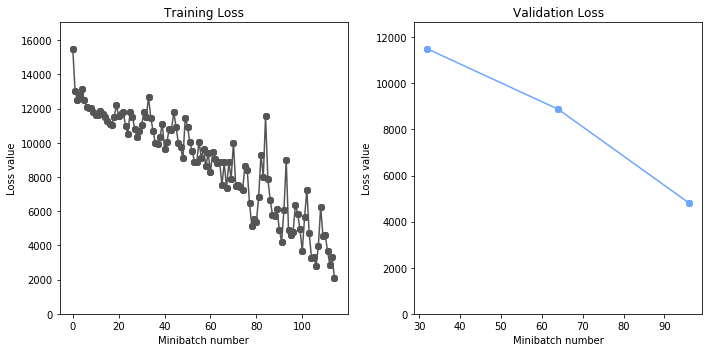

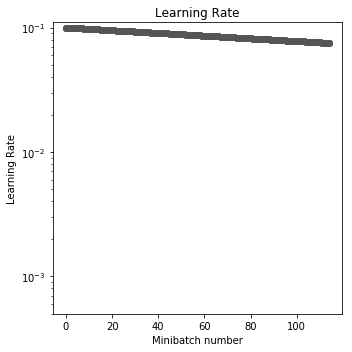

In [219]:
# Name: model15
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model15.overfit', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 51


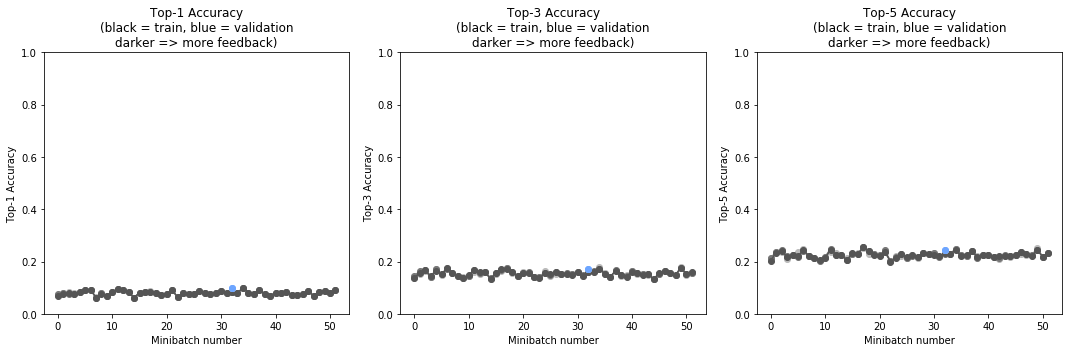

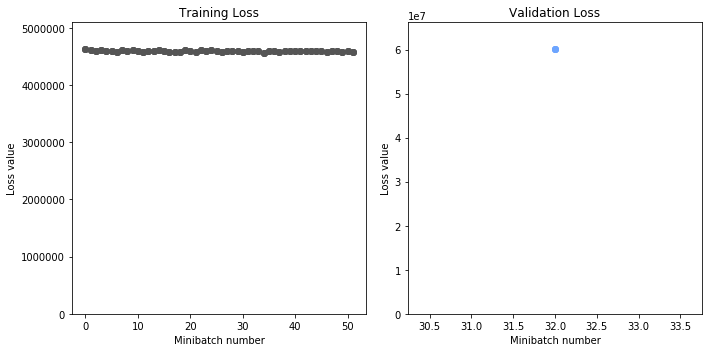

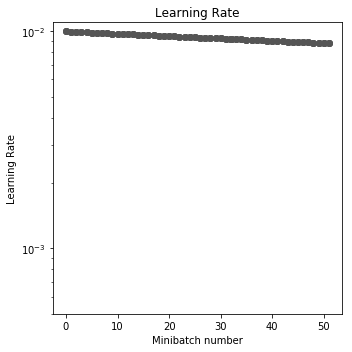

In [220]:
# Name: model14
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model14.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
772, 6, 8503, 0.01444690115749836, 0, 0.8106060606060606, 0.9517045454545454, 0.9734848484848485, 2482447.375, , , , , ,
772, 6, 8503, 0.01444690115749836, 1, 0.8125, 0.9583333333333334, 0.9763257575757576, 2482447.375, , , , , ,
772, 6, 8503, 0.01444690115749836, 2, 0.8096590909090909, 0.9602272727272727, 0.9763257575757576, 2482447.375, , , , , ,
batch_num: 772


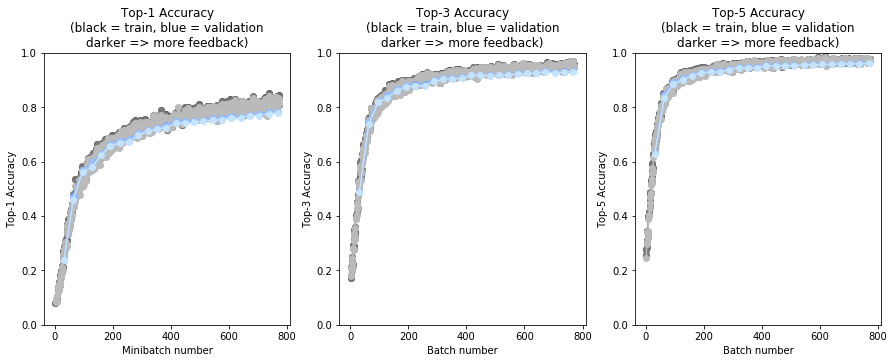

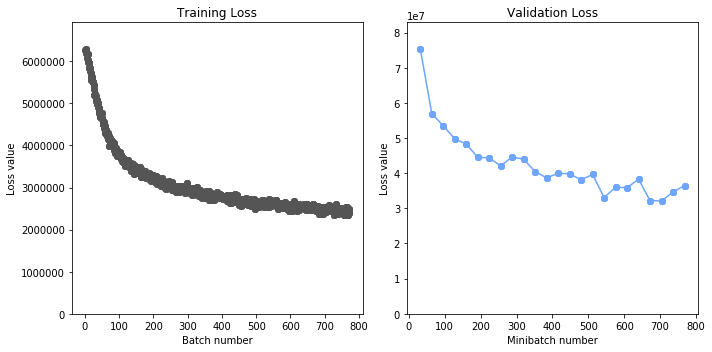

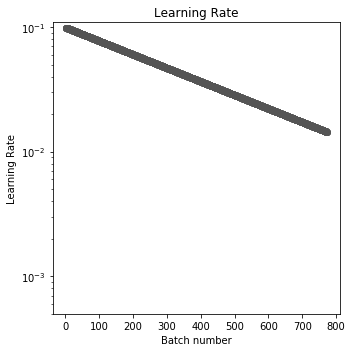

In [446]:
# Name: model13
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model13', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 579


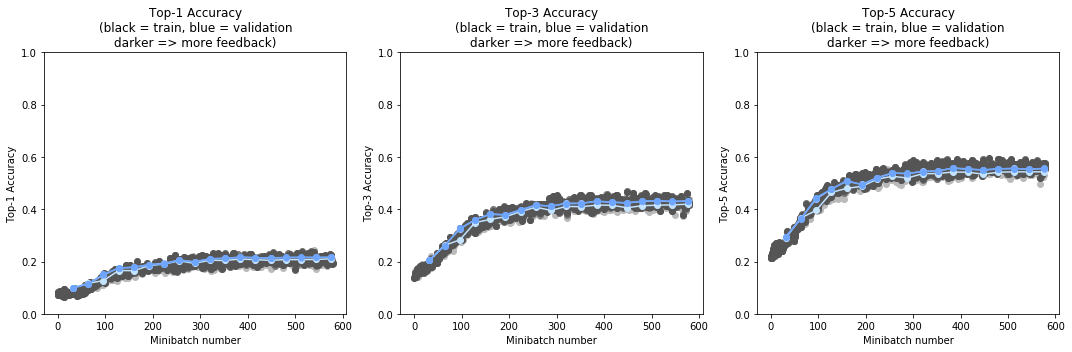

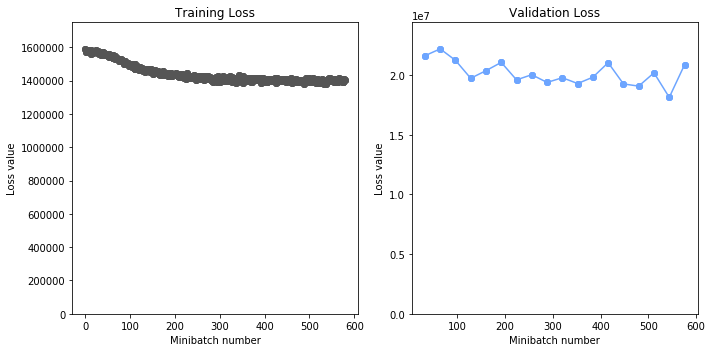

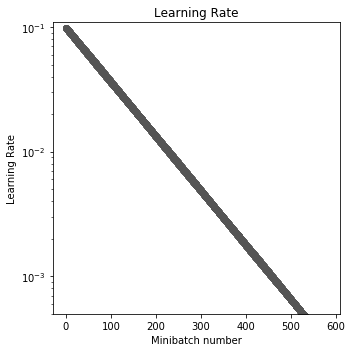

In [50]:
# Name: model8
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model8', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 20


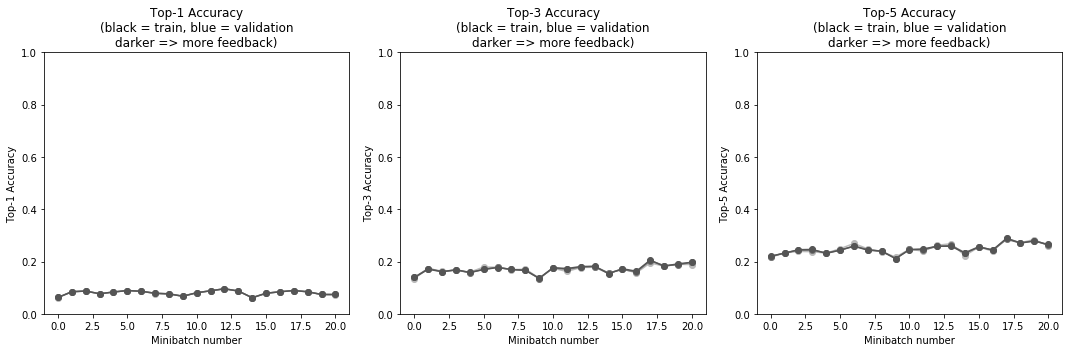

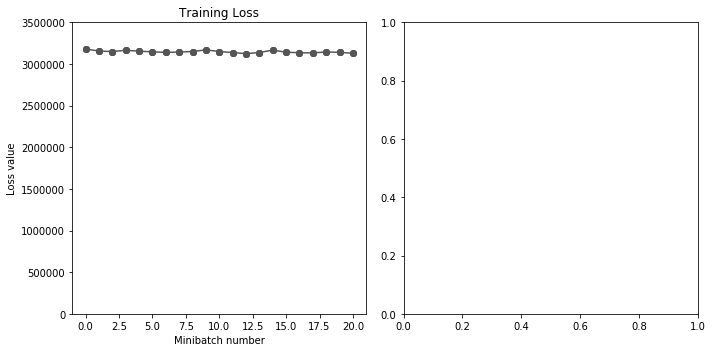

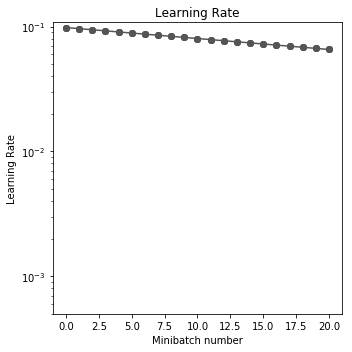

In [311]:
# Name: model7
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'vfeedbacknet_model7', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 19


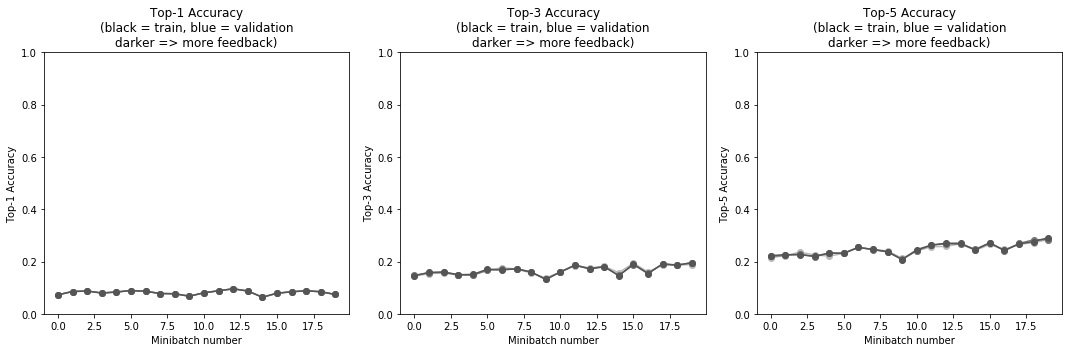

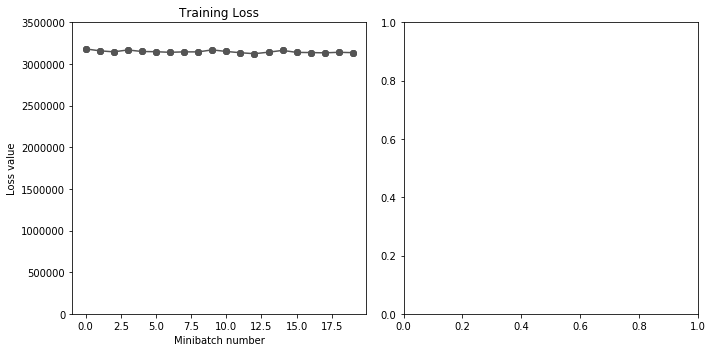

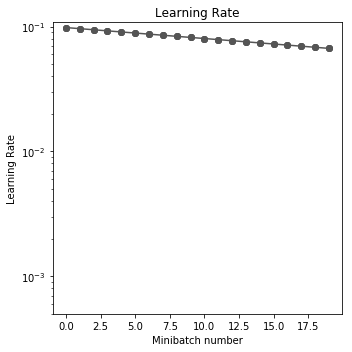

In [309]:
# Name: model6
# VGG16 preprocess conv layer is now more reasonable (3x3x512 conv)
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model6', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 130


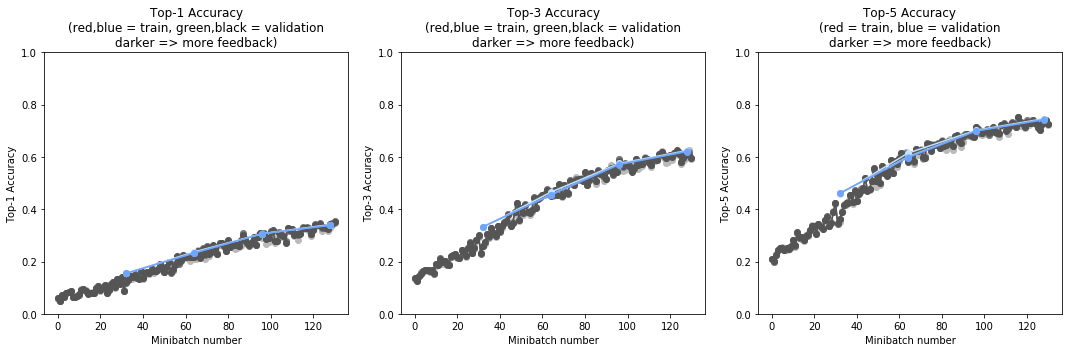

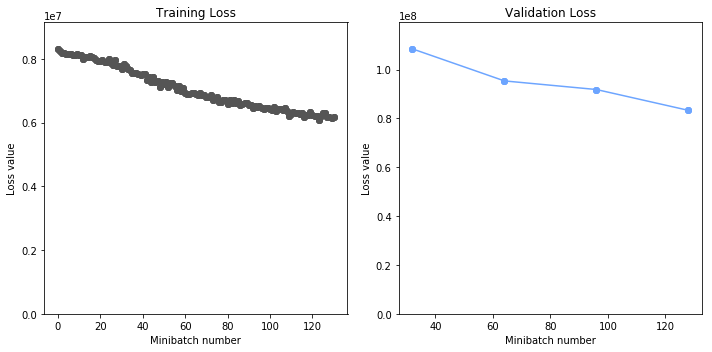

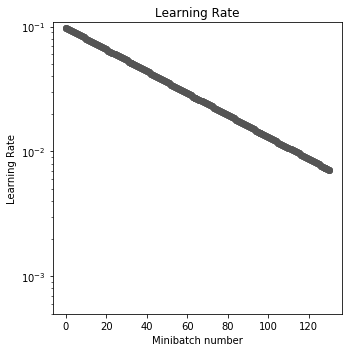

In [73]:
# Name: model5.last_loss_multipler
# Summary: pretrained VGG16 features feed into lstm-based feedback network with last iteration loss-boost
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model5.last_loss_multipler', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)youtube
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 188


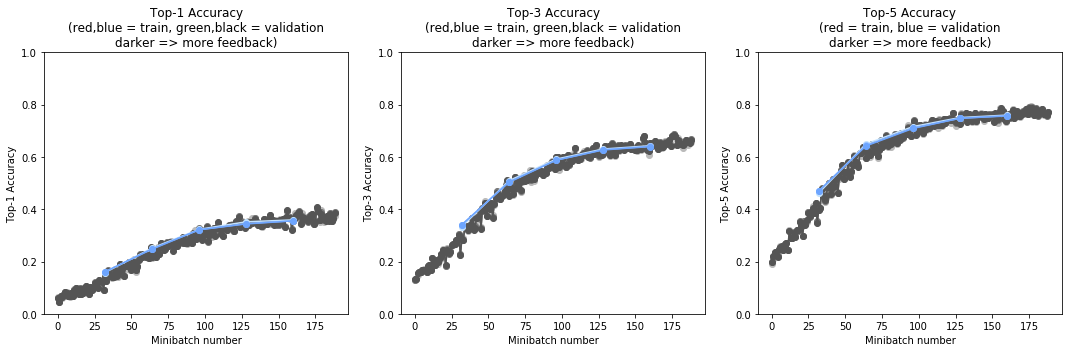

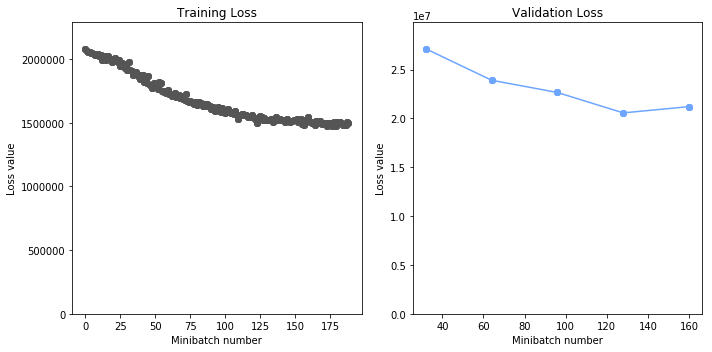

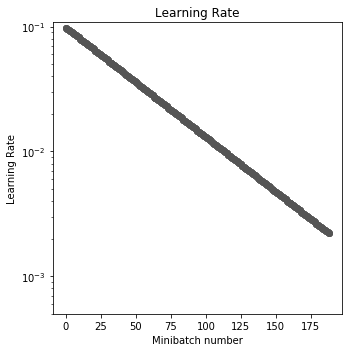

In [72]:
# Name: model5
# Summary: pretrained VGG16 features feed into lstm-based feedback network (without last iteration loss-boost)
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model5', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 209


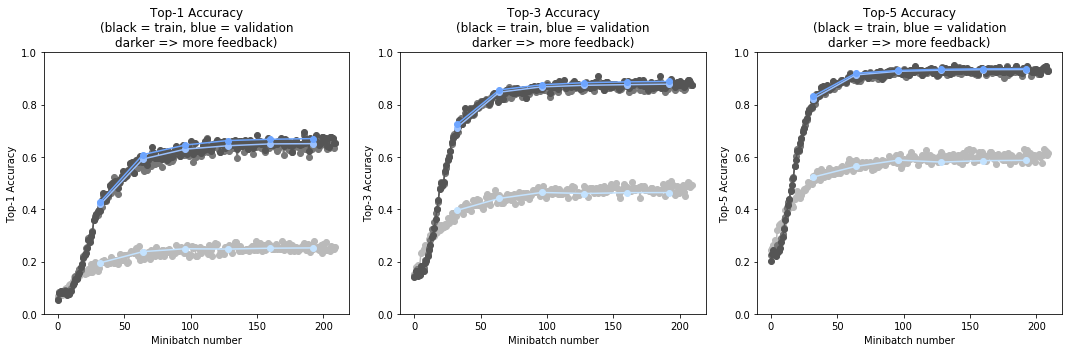

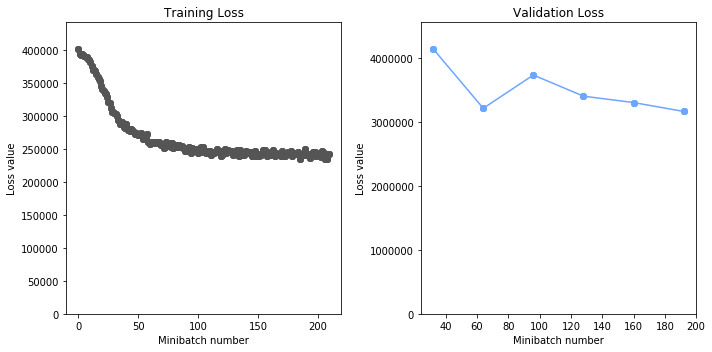

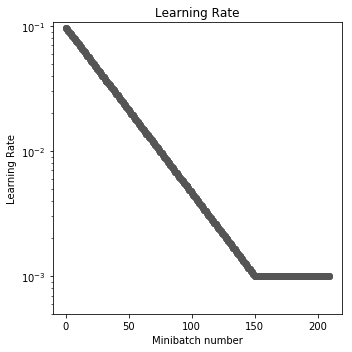

In [307]:
# Name: model4
# Summary: pretrained VGG16 features feed into simple deconv + convLSTM feedback mechanism
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model4', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 347


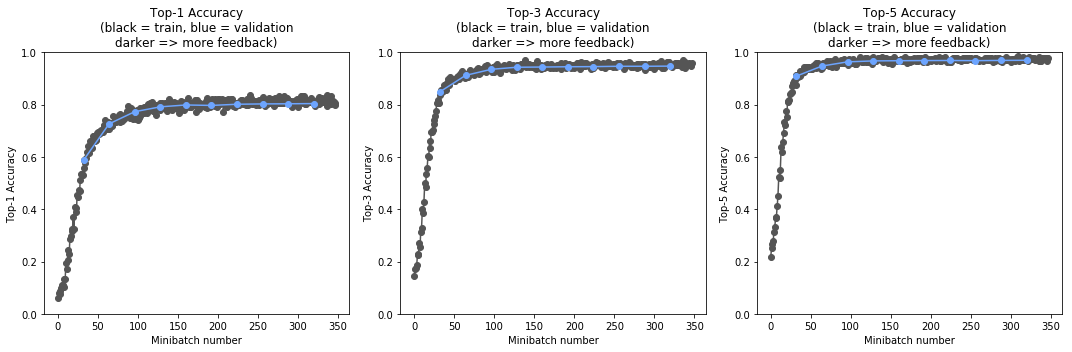

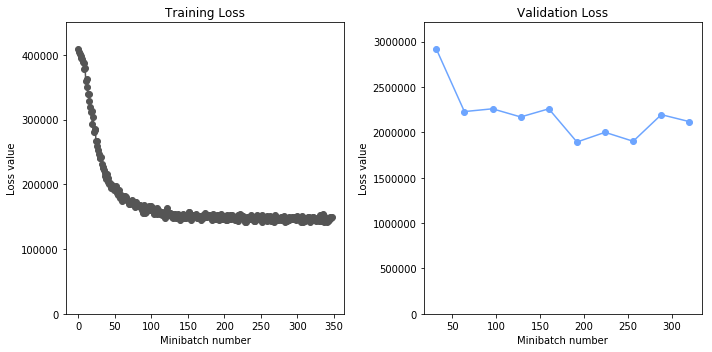

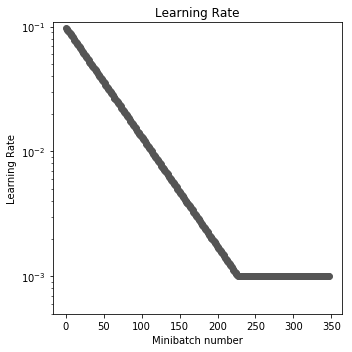

In [299]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model1.recheck4', 'training_log.csv'))
plot_accuracy(data, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 220


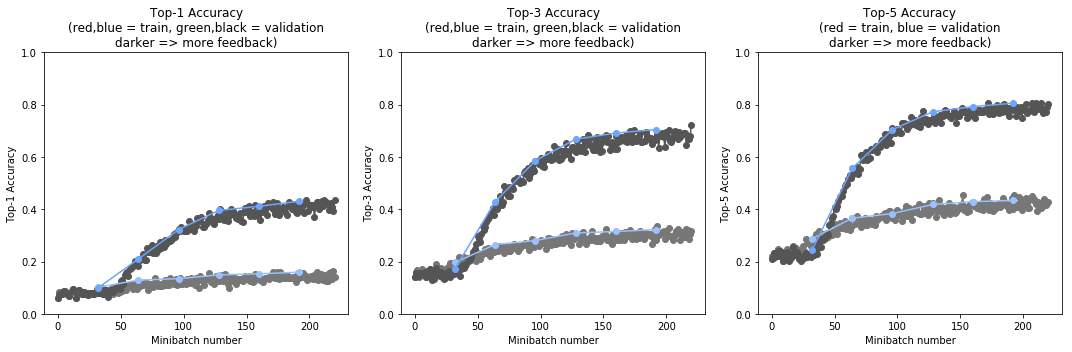

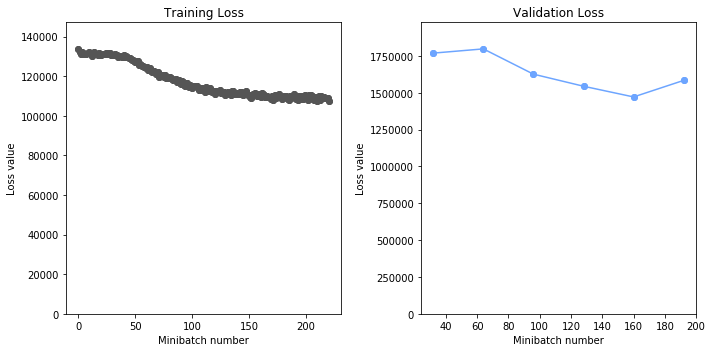

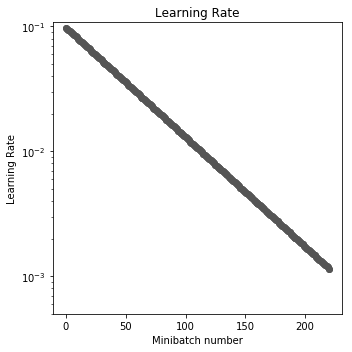

In [285]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model3.recheck1', 'training_log.csv'))
plot_accuracy(data, num_feedback=2, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 321


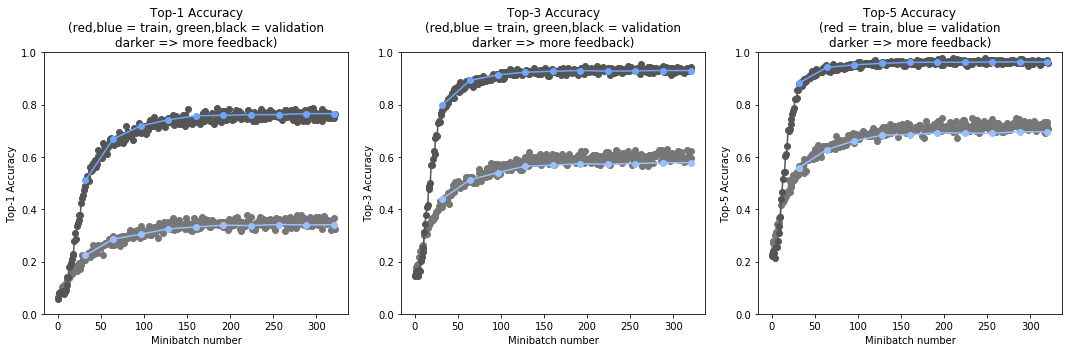

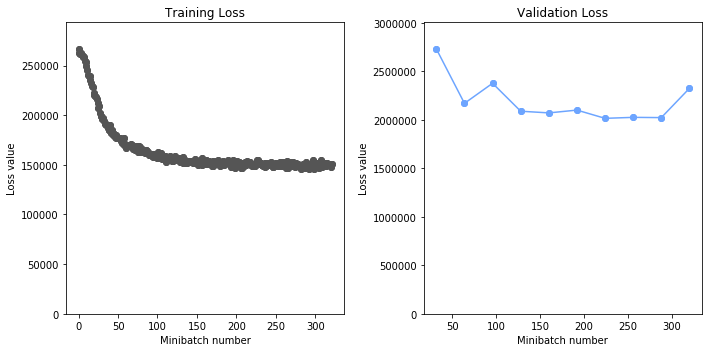

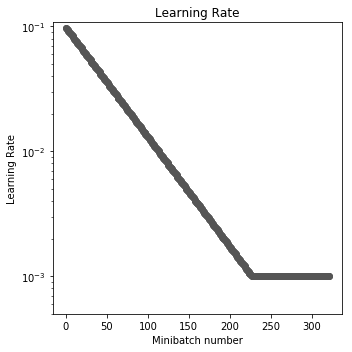

In [286]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model2.recheck1', 'training_log.csv'))
plot_accuracy(data, num_feedback=2, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
382, 3, 24512, 0.0010000000474974513, 0, 0.87890625, 0.96875, 0.9853515625, 25899.201904296875, , , , , ,
383, 3, 24576, 0.0010000000474974513, 0, 0.8701171875, 0.970703125, 0.984375, 25986.48699951172, , , , , ,
384, 3, 24640, 0.0010000000474974513, 0, 0.8662109375, 0.9736328125, 0.9892578125, 25876.80938720703, , , , , ,
batch_num: 384


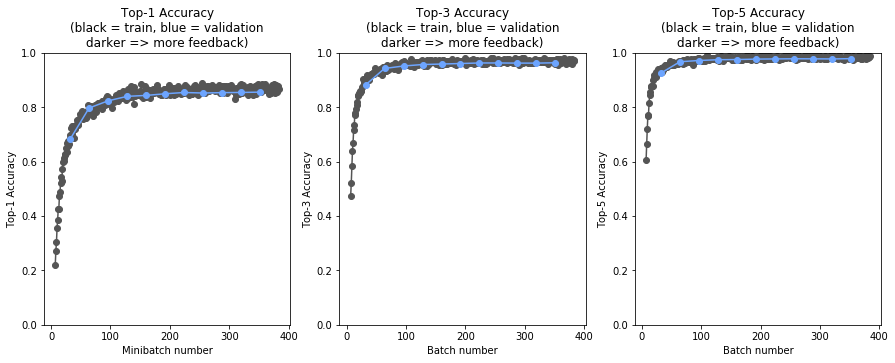

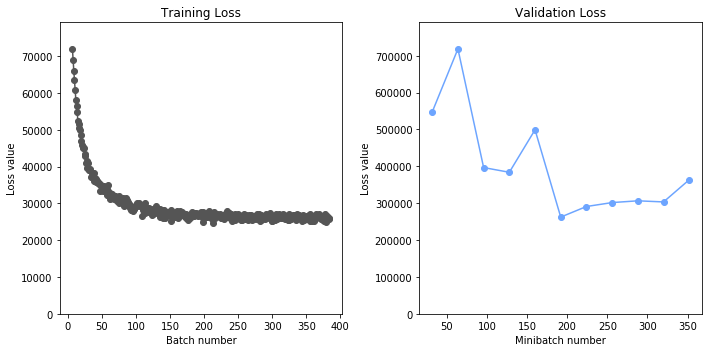

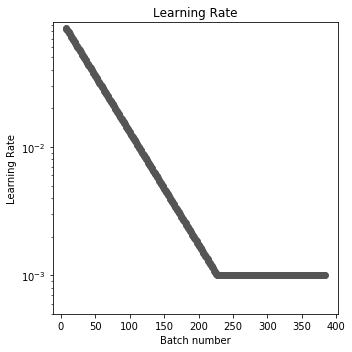

In [447]:
# name: model1
# VGG16 features feed into two-layer convLSTM
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model1.recheck3', 'training_log.csv'))
plot_accuracy(data, ylim=1)
plot_loss(data)
plot_learning_rate(data)